In [41]:
pip install pandas-datareader

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd

#Stats
import statsmodels.api as sm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [43]:
stk_tickers =["MSFT","IBM","GOOGL"]
ccy_tickers = ["DEXJPUS","DEXUSUK"]
idx_tickers = ["SP500","DJIA","VIXCLS"]

In [44]:
stk_data = web.DataReader(stk_tickers,"yahoo")
ccy_data = web.DataReader(ccy_tickers,"fred")
idx_data = web.DataReader(idx_tickers,"fred")

In [45]:
stk_data

Attributes Adj Close                     Close                      High  \
Symbols         MSFT      IBM    GOOGL    MSFT      IBM    GOOGL    MSFT   
Date                                                                       
2017-02-27    59.958  135.803   849.67   64.23  171.511   849.67   64.54   
2017-02-28    59.724  136.121   844.93   63.98  171.912   844.93   64.20   
2017-03-01    60.621  137.733   856.75   64.94  173.948   856.75   64.99   
2017-03-02    59.752  136.658   849.85   64.01  172.591   849.85   64.75   
2017-03-03    59.976  136.295   849.08   64.25  172.132   849.08   64.28   
...              ...      ...      ...     ...      ...      ...     ...   
2022-02-16   299.500  129.180  2754.76  299.50  129.180  2754.76  300.87   
2022-02-17   290.730  124.970  2650.78  290.73  124.970  2650.78  296.80   
2022-02-18   287.930  124.350  2608.06  287.93  124.350  2608.06  293.86   
2022-02-22   287.720  123.920  2596.27  287.72  123.920  2596.27  291.54   
2022-02-23   280.270  122.070  2551.76  280.27  122.070  2551.76  291.70   

Attributes                       Low                      Open           \
Symbols         IBM    GOOGL    MSFT      IBM    GOOGL    MSFT      IBM   
Date                                                                      
2017-02-27  173.279   850.67   64.05  171.396   843.01   64.54  173.222   
2017-02-28  172.686   848.83   63.76  171.463   841.44   64.08  171.491   
2017-03-01  174.522   858.00   64.02  172.113   849.02   64.13  172.543   
2017-03-02  173.881   856.49   63.88  172.495   848.72   64.69  173.881   
2017-03-03  173.346   850.82   63.62  171.855   844.71   63.99  172.591   
...             ...      ...     ...      ...      ...     ...      ...   
2022-02-16  130.440  2761.72  293.68  128.260  2698.48  298.37  129.450   
2022-02-17  128.500  2742.27  290.00  124.850  2649.57  296.36  128.050   
2022-02-18  125.440  2681.40  286.31  123.610  2603.93  293.05  124.940   
2022-02-22  125.000  2643.61  284.50  122.680  2564.47  285.00  124.200   
2022-02-23  124.700  2641.02  280.10  121.870  2550.55  290.18  124.380   

Attributes              Volume                        
Symbols       GOOGL       MSFT        IBM      GOOGL  
Date                                                  
2017-02-27   844.95  1.587e+07  3.861e+06  1.010e+06  
2017-02-28   847.35  2.324e+07  3.424e+06  1.383e+06  
2017-03-01   851.38  2.694e+07  3.144e+06  1.819e+06  
2017-03-02   856.31  2.454e+07  3.052e+06  1.251e+06  
2017-03-03   848.94  1.814e+07  1.906e+06  1.005e+06  
...             ...        ...        ...        ...  
2022-02-16  2732.93  2.998e+07  4.876e+06  1.251e+06  
2022-02-17  2724.86  3.246e+07  6.797e+06  1.948e+06  
2022-02-18  2669.34  3.422e+07  4.608e+06  2.277e+06  
2022-02-22  2596.76  4.174e+07  5.350e+06  2.250e+06  
2022-02-23  2632.97  3.767e+07  4.084e+06  1.633e+06  

[1258 rows x 18 columns]

In [46]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-27,2369.75,20837.44,12.09
2017-02-28,2363.64,20812.24,12.92
2017-03-01,2395.96,21115.55,12.54
2017-03-02,2381.92,21002.97,11.81
2017-03-03,2383.12,21005.71,10.96
...,...,...,...
2022-02-17,4380.26,34312.03,28.11
2022-02-18,4348.87,34079.18,27.75
2022-02-21,NaN,NaN,NaN


In [47]:
(stk_data.loc[:,("Adj Close","MSFT")]).describe()

count    1258.000
mean      158.351
std        79.227
min        59.724
25%        93.856
50%       134.080
75%       213.698
max       342.402
Name: (Adj Close, MSFT), dtype: float64

In [48]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).\
shift(-return_period)
Y.name = Y.name[-1]+'_pred'

In [49]:
Y.name=Y.name[-1]+ "_pred"

In [50]:
Y.name

'd_pred'

In [51]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period,
                                                                             return_period*3,
                                                                             return_period*6,
                                                                             return_period*12]],axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1,X2,X3,X4], axis=1)
dataset = pd.concat([X,Y],axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:,Y.name]
X = dataset.loc[:,X.columns]

In [52]:
X

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-05-23,-0.011,0.006,-0.014,5.561e-03,-9.377e-04,-1.996e-03,0.007,-0.011,-0.003,0.053,0.073
2017-05-31,0.004,0.017,-0.012,-2.322e-03,3.077e-03,-1.794e-04,0.038,0.017,0.017,0.072,0.089
2017-06-08,-0.004,0.016,-0.010,3.484e-03,1.534e-03,1.812e-03,0.027,0.026,0.064,0.065,0.116
2017-06-15,0.014,-0.045,0.005,-1.330e-02,-5.466e-04,8.339e-03,0.070,-0.029,0.016,0.018,0.091
2017-06-22,0.001,0.017,0.006,-8.574e-03,8.383e-04,1.749e-03,-0.039,0.005,0.002,0.019,0.079
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,-0.004,0.006,-0.015,1.357e-02,-7.914e-03,-3.396e-03,0.035,-0.029,-0.089,-0.080,-0.009
2022-01-21,-0.041,-0.061,-0.001,-7.932e-03,-5.849e-02,-4.693e-02,0.408,-0.029,-0.136,-0.124,-0.045
2022-01-31,0.036,0.034,0.012,-5.951e-04,2.362e-02,2.208e-02,-0.186,0.048,-0.010,-0.044,-0.070
2022-02-07,0.027,0.028,-0.001,6.970e-03,-7.040e-03,-1.160e-03,-0.083,-0.033,-0.030,-0.106,-0.093


### Exploratory data analysis


### Desccriptiv Analysis

In [53]:
pd.set_option("precision", 3)

In [54]:
dataset.describe()

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,d_pred
count,2.250e+02,225.000,2.250e+02,2.250e+02,225.000,225.000,225.000,225.000,225.000,225.000,225.000,225.000
mean,3.519e-04,0.004,-8.697e-06,-4.748e-04,0.002,0.001,0.009,0.006,0.018,0.039,0.082,0.006
std,3.758e-02,0.037,8.939e-03,1.220e-02,0.026,0.028,0.177,0.033,0.050,0.064,0.072,0.034
min,-1.683e-01,-0.159,-3.293e-02,-5.492e-02,-0.162,-0.190,-0.559,-0.145,-0.165,-0.288,-0.139,-0.153
25%,-1.718e-02,-0.013,-5.348e-03,-6.905e-03,-0.007,-0.008,-0.087,-0.013,-0.008,0.005,0.044,-0.013
50%,2.102e-03,0.007,4.806e-04,-1.442e-03,0.004,0.004,-0.002,0.008,0.017,0.041,0.085,0.007
75%,1.734e-02,0.023,5.467e-03,6.167e-03,0.015,0.014,0.089,0.024,0.052,0.077,0.130,0.026
max,1.304e-01,0.134,3.800e-02,5.121e-02,0.098,0.121,0.910,0.100,0.186,0.285,0.283,0.100


### 3.2 Data visualization.

In [74]:
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

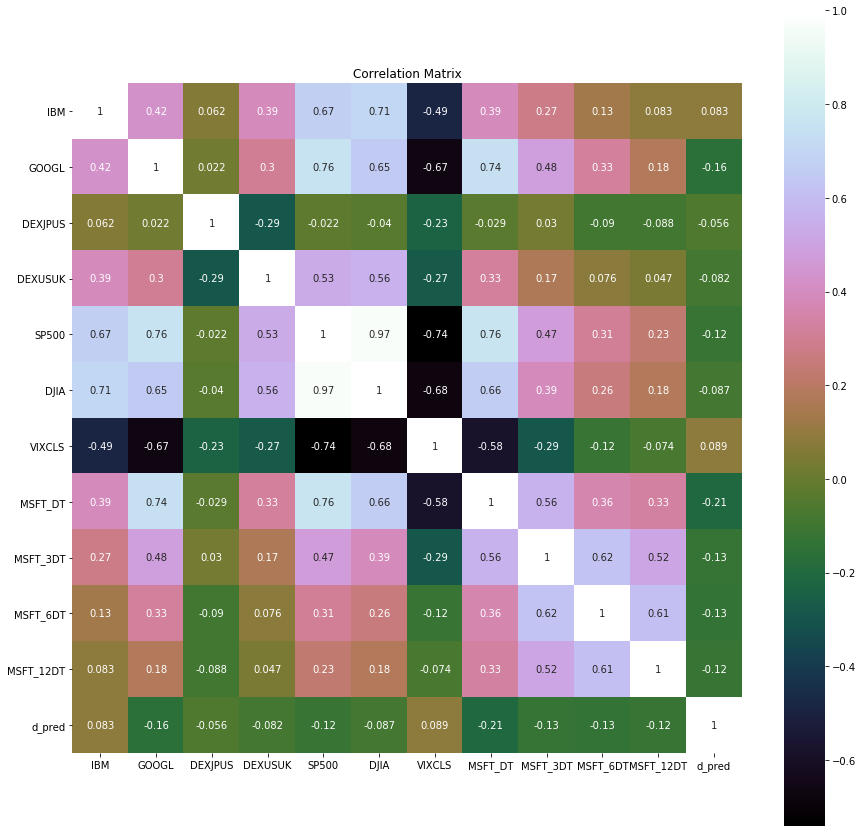

In [75]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

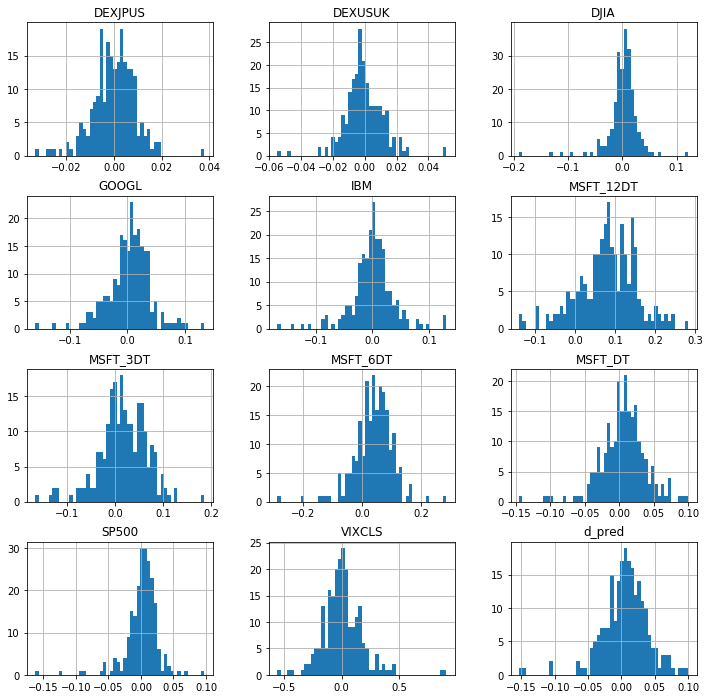

In [76]:
dataset.hist(bins=50,figsize=(12,12));

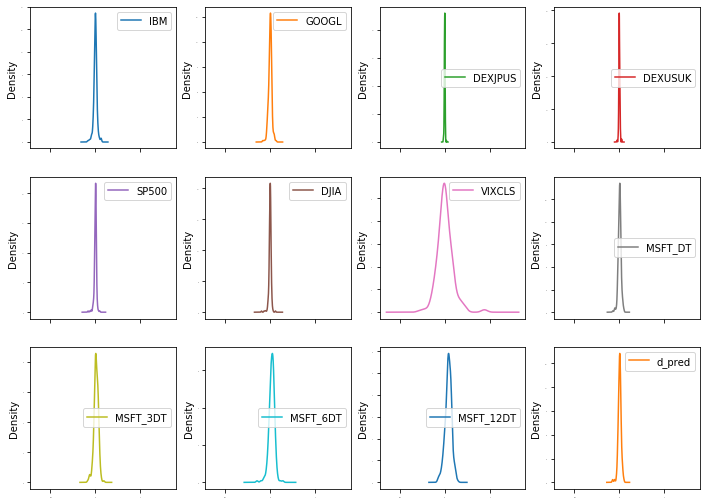

In [77]:
dataset.plot(kind="density",figsize=(12,12),subplots=True,fontsize=1,sharex=True, layout =(4,4));

<Figure size 864x864 with 0 Axes>

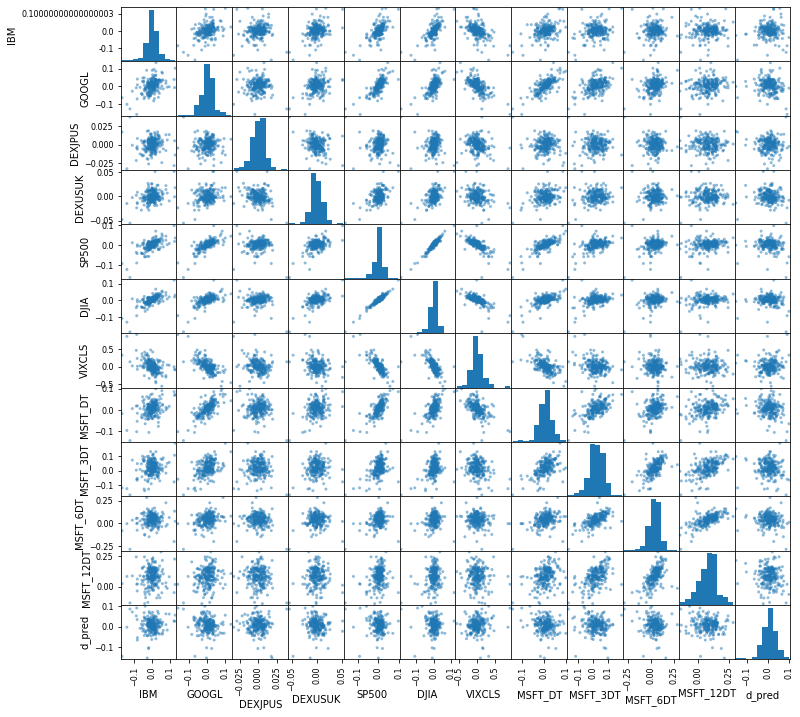

In [79]:
pyplot.figure(figsize=(12,12))
scatter_matrix(dataset,figsize=(12,12));

### 3.3 Time Series Analysis


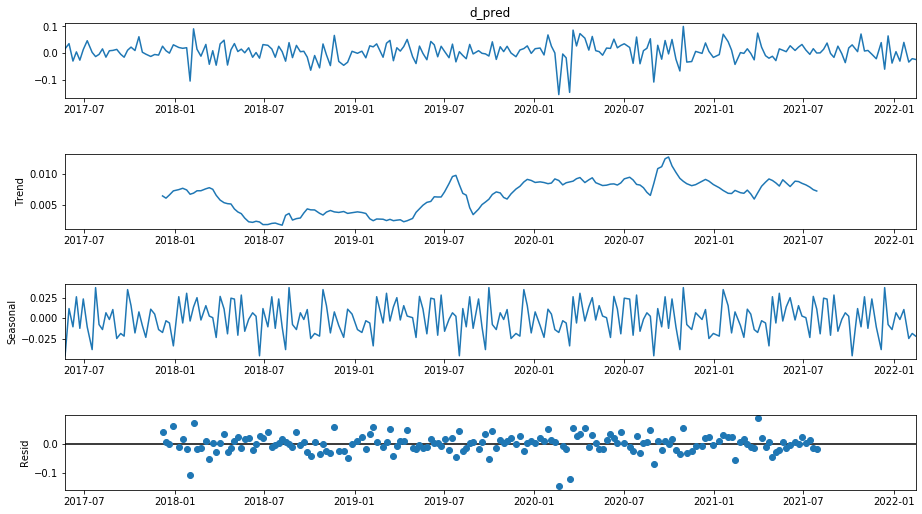

In [95]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

### 4.2. Feature Selection


In [103]:
bestfeature = SelectKBest(k=5,score_func=f_regression)
fit = bestfeature.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns =["Specs","Score"]
featureScores.nlargest(10,"Score")

,Specs,Score
7,MSFT_DT,9.973
1,GOOGL,5.652
9,MSFT_6DT,3.899
8,MSFT_3DT,3.612
10,MSFT_12DT,3.229
4,SP500,3.213
6,VIXCLS,1.782
5,DJIA,1.689
0,IBM,1.555
3,DEXUSUK,1.508
